In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import oom
from src.oom.DiscreteValuedOOM import DiscreteValuedOOM, get_matrices
from src.oom.observable import *

sys.modules['oom'] = oom

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [13]:
n_obs = 20
src_dim = 16
learnlen = 70000
testlen = 30000

random_oom = DiscreteValuedOOM.from_sparse(
    src_dim,
    density = 0.8,
    alphabet_size = n_obs,
    deterministic_functional = False
)

dim_search = [8, 16, 32, 64, 96, 128, 160, 196, 232]
nlls_err_learned = []

_, nlls_ground, seq = random_oom.generate(length = learnlen + testlen)
_, nlls_ground_test = random_oom.compute(seq[learnlen:])

for idx, target_dim in enumerate(dim_search):
    # Get estimate matrices
    print(f"Target_dim = {target_dim}: k = ", end='')
    
    learned_oom = DiscreteValuedOOM.from_data(
        seq,
        target_dim,
        max_length = 3
    )
    print("| Done")
    
    # Save difference in nll from ground (min) to learned
    _, nlls_learned_test = learned_oom.compute(seq[learnlen:])
    nlls_err_learned.append(nlls_learned_test[-1])

Target_dim = 8: k = 0 1 2 3 4 5 | Done
Target_dim = 16: k = 0 1 2 3 4 5 | Done
Target_dim = 32: k = 0 1 2 3 4 5 | Done
Target_dim = 64: k = 0 1 2 3 4 5 | Done
Target_dim = 96: k = 0 1 2 3 4 5 | Done
Target_dim = 128: k = 0 1 2 3 4 5 | Done
Target_dim = 160: k = 0 1 2 3 4 5 | Done
Target_dim = 196: k = 0 1 2 3 4 5 | Done
Target_dim = 232: k = 0 1 2 3 4 5 | Done


In [14]:
for dim, nll in zip(dim_search, nlls_err_learned):
    print(dim, nll)

8 3.676593952442335
16 3.3634221572484697
32 3.2599104809956674
64 3.250768512538111
96 3.333597133988835
128 3.276691080153816
160 3.272311555130136
196 3.268398011868818
232 3.272438539724248


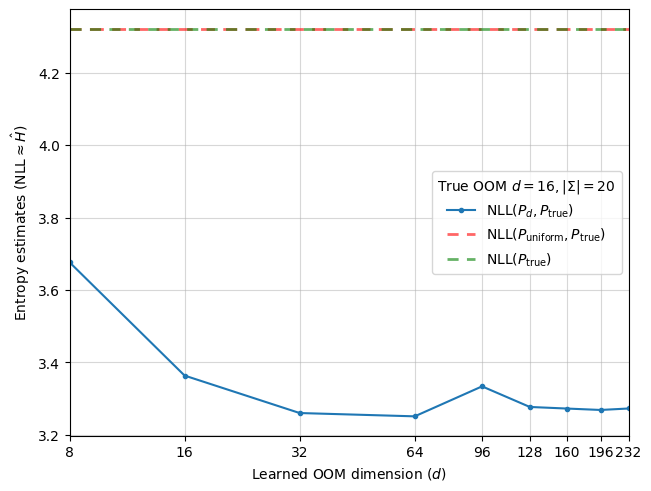

In [33]:
xlims = [min(dim_search), max(dim_search)]

fig = plt.figure()
ax = plt.gca()

# Entropy estimates of learned OOMs on test sequence (by dimension)
ax.plot(dim_search, nlls_err_learned,
         marker='o', markersize=3,
         label = r"$\text{NLL}(P_d, P_\text{true})$")

# Entropy of uniform process
ax.hlines(y = np.log2(n_obs), xmin=xlims[0], xmax=xlims[1],
           color='r', ls=(1, (5, 3)), linewidth=2, alpha=0.6,
           label = r"$\text{NLL}(P_\text{uniform}, P_\text{true})$")

# Entropy estimates of ground OOM on test sequence
ax.hlines(y = nlls_ground_test[-1], xmin=xlims[0], xmax=xlims[1],
           color='g', ls=(0, (4, 3)), linewidth=2, alpha=0.6,
           label = r"$\text{NLL}(P_\text{true}$)")

ax.set_xscale('log', base=2)
ax.set_xticks(dim_search)
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlim(xlims)
ax.set_xlabel("Learned OOM dimension ($d$)")

ax.set_ylabel("Entropy estimates ($\\text{NLL} \\approx \\hat{H}$)")

ax.legend(loc="center right", title=f"True OOM $d = {src_dim}, \\vert\\Sigma\\vert = {n_obs}$")
ax.grid(True, alpha=0.5)

fig.set_layout_engine("constrained")

fig.savefig(f"performance_d{src_dim}_S{n_obs}.pdf")

plt.show()

In [34]:
nlls_ground[-1]

4.32029075082285

In [35]:
# n_obs = 3
np.log2(n_obs)

4.321928094887363